In [1]:
import importlib

In [2]:
import src.preprocessing.aggregator as aggregator

importlib.reload(aggregator)
agg = aggregator.Aggregator

file_name = 'Hourly113207AzadrahTehran-Pardis(Boumehen).xlsx'

agg = agg(file_name)
df = agg.aggregate_data()

df.head()

,axis code,axis name,end time,operating time (minutes),total number of vehicles,number of Class 1 vehicles,number of Class 2 vehicles,number of Class 3 vehicles,number of Class 4 vehicles,number of Class 5 vehicles,...,number of speeding violations,number of unauthorized distance violations,number of unauthorized overtaking violations,estimated number,date,start hour,end hour,year,month,season
0,113207,آزادراه تهران - پرديس (بومهن),2022-03-21 01:00:00,60,1190.0,1188.0,1.0,1.0,0.0,0.0,...,16.0,57.0,0.0,1190.0,2022-03-21,0,1,1401,farvardin,spring
1,113207,آزادراه تهران - پرديس (بومهن),2022-03-21 02:00:00,60,1013.0,1013.0,0.0,0.0,0.0,0.0,...,15.0,29.0,0.0,1013.0,2022-03-21,1,2,1401,farvardin,spring
2,113207,آزادراه تهران - پرديس (بومهن),2022-03-21 03:00:00,60,660.0,660.0,0.0,0.0,0.0,0.0,...,11.0,17.0,0.0,660.0,2022-03-21,2,3,1401,farvardin,spring
3,113207,آزادراه تهران - پرديس (بومهن),2022-03-21 04:00:00,60,496.0,495.0,0.0,1.0,0.0,0.0,...,6.0,9.0,0.0,496.0,2022-03-21,3,4,1401,farvardin,spring
4,113207,آزادراه تهران - پرديس (بومهن),2022-03-21 05:00:00,60,510.0,510.0,0.0,0.0,0.0,0.0,...,9.0,8.0,0.0,510.0,2022-03-21,4,5,1401,farvardin,spring


In [3]:
import src.preprocessing.data_selector as data_selector

importlib.reload(data_selector)
ds = data_selector.DataSelector

ds = ds(df)

selected_data = ds.filter_by_year(1403)

selected_data


,start hour,total number of vehicles,number of Class 1 vehicles,number of Class 2 vehicles,number of Class 3 vehicles,number of Class 4 vehicles,number of Class 5 vehicles,estimated number,average speed,number of speeding violations,number of unauthorized distance violations,number of unauthorized overtaking violations
0,0,993.558912,989.975831,2.256798,0.761329,0.429003,0.135952,1009.223871,102.057229,94.108434,223.957831,0.0
1,1,693.533736,690.841893,1.667674,0.546828,0.320242,0.157100,707.917440,101.903614,69.012048,117.400602,0.0
2,2,417.297080,415.185297,1.308157,0.362538,0.314199,0.126888,428.704947,101.006024,39.638554,43.879518,0.0
3,3,284.160121,282.302115,1.051360,0.356495,0.338369,0.111782,294.464224,100.027108,23.503012,21.147590,0.0
4,4,345.506546,343.321249,1.362538,0.293051,0.372608,0.157100,357.911008,100.132530,23.126506,36.216867,0.0
5,5,654.206445,650.863041,2.148036,0.435045,0.518630,0.241692,667.933131,101.713855,44.475904,120.250000,0.0
6,6,1088.604230,1081.383686,4.311178,1.226586,1.326284,0.356495,1109.407295,102.503012,80.424699,280.822289,0.0
7,7,1607.728097,1598.691843,5.761329,1.314199,1.483384,0.477341,1640.866261,103.415663,135.623494,563.027108,0.0
8,8,1936.018072,1928.081325,4.768072,1.521084,1.231928,0.415663,1963.598485,103.304217,175.352410,785.503012,0.0
9,9,2091.728916,2083.484940,4.695783,1.906627,1.093373,0.548193,2117.421212,102.460843,175.653614,895.069277,0.0


In [4]:
import src.visualization.visualizer as visualizer

importlib.reload(visualizer)
gv = visualizer.GraphVisualizer

gv = gv(selected_data)

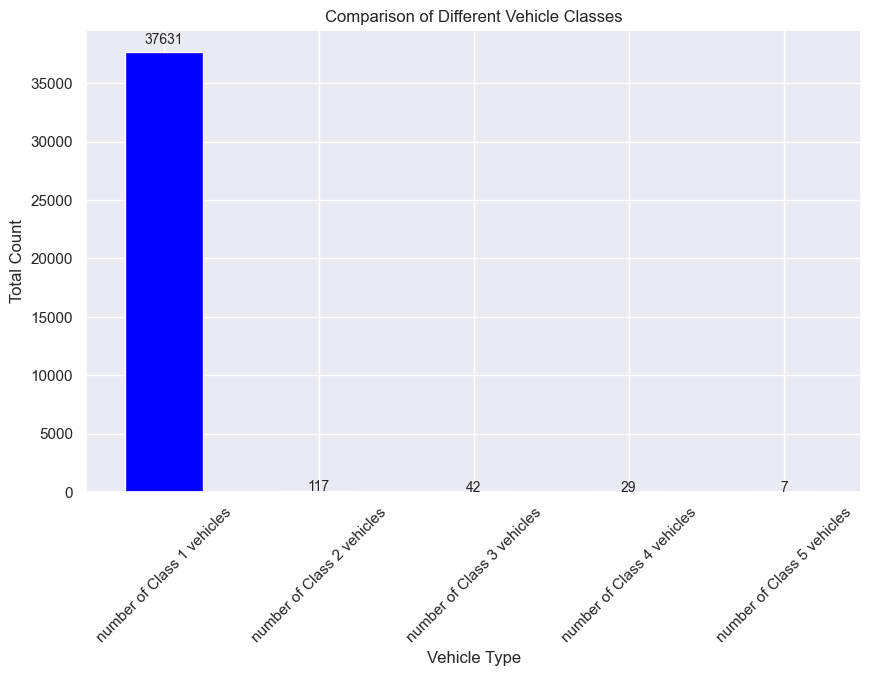

In [5]:
gv.plot_vehicle_comparison()

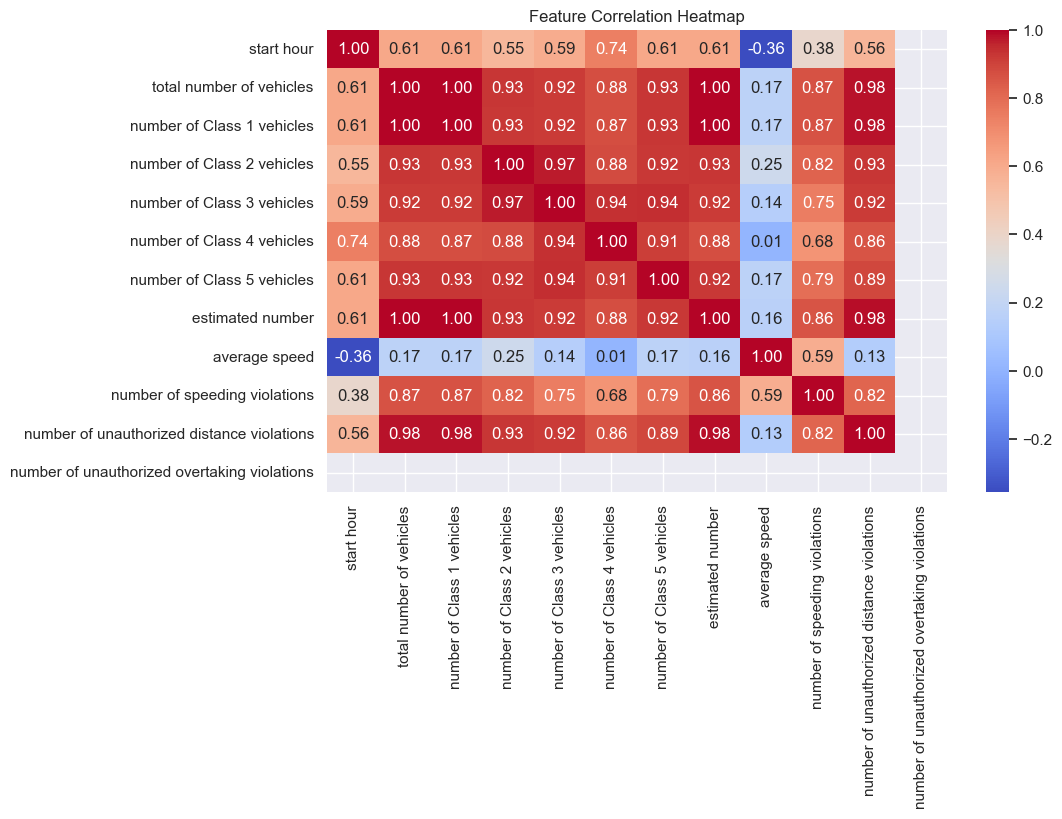

In [21]:
gv.plot_correlation_heatmap()

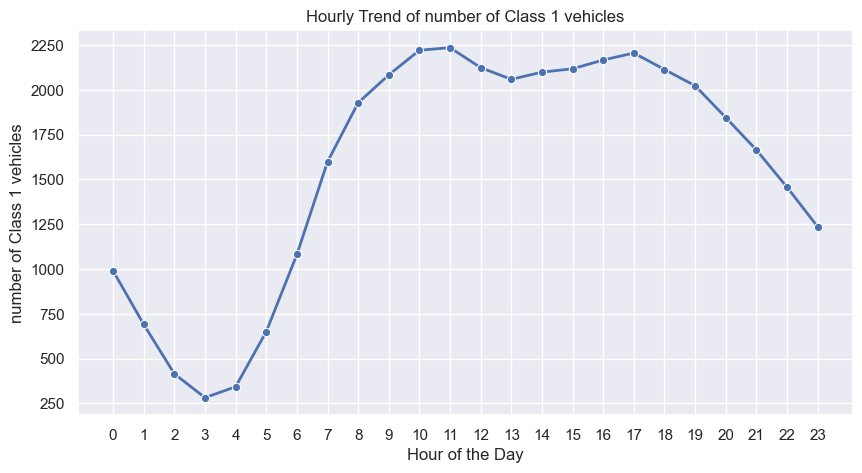

In [30]:
gv.plot_hourly_trend('number of Class 1 vehicles')

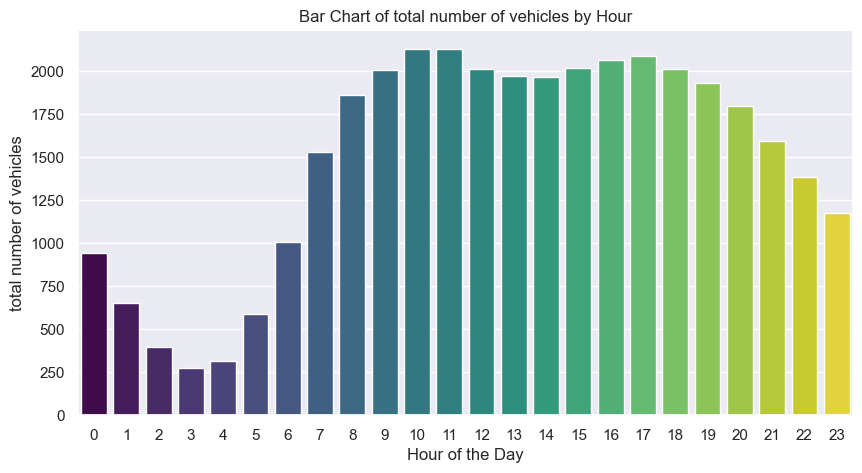

In [12]:
gv.plot_bar_chart('total number of vehicles')

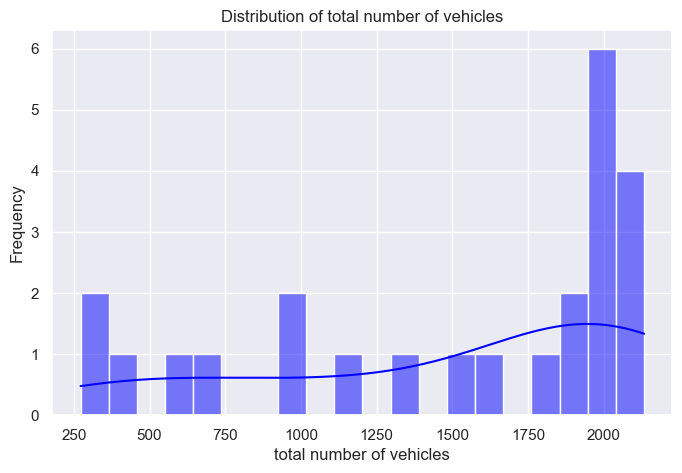

In [13]:
gv.plot_histogram('total number of vehicles')

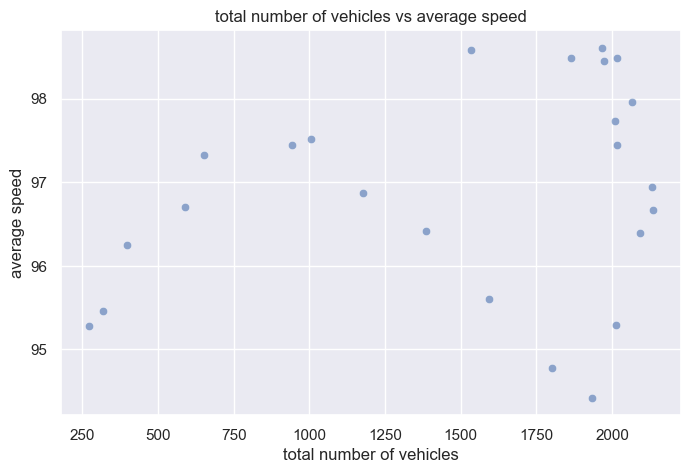

In [15]:
gv.plot_scatter('total number of vehicles', 'average sped')

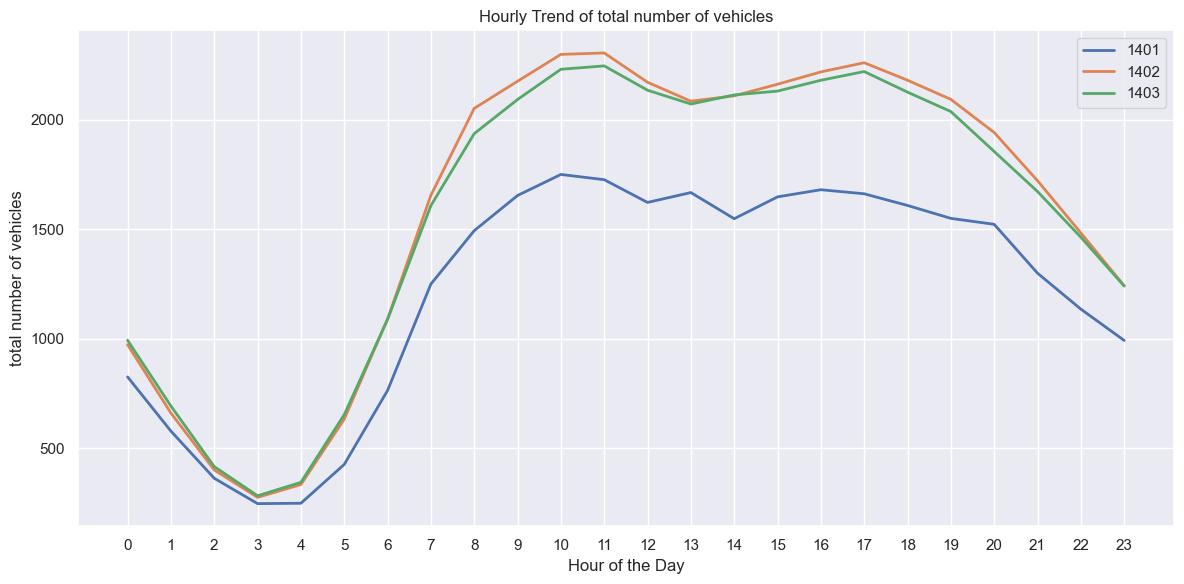

In [6]:
data1 = ds.filter_by_year(1401)
data2 = ds.filter_by_year(1402)
data3 = ds.filter_by_year(1403)

data = [
    {"df": data1, "label": "1401"},
    {"df": data2, "label": "1402"},
    {"df": data3, "label": "1403"}
]

visualizer.plot_hourly_trend_from_dfs(data, 'total number of vehicles')